# Creating a Single-Point Reciprocal Space Map with xrayutilities

In [3]:
import matplotlib.pyplot as plt
import xrayutilities as xu

In [4]:
# Non-angle values currently taken from spec
energy = 11215
ub_matrix = [
    [-1.557334998, 0.08673232227, -0.07365031356],
    [-0.1136370296, -1.134140697, 1.067263165],
    [0.005787047496, 1.069785746, 1.137437527]
]

In [5]:
# Info taken from instrument config XML in current setup
sample_circle_dir = ['x+', 'z-', 'y+', 'z-']
detector_circle_dir = ['x+', 'z-']
primary_beam_dir = [0, 1, 0]

# Create goniometer geometry
q_conversion = xu.experiment.QConversion(
    sampleAxis=sample_circle_dir, 
    detectorAxis=detector_circle_dir, 
    r_i=primary_beam_dir
)

In [6]:
# Info taken from instrument config XML in current setup
inplane_reference_dir = [0, 1, 0]
sample_normal_dir = [0, 0, 1]

# Create experiment (HXRD) object
hxrd = xu.HXRD(
    idir=inplane_reference_dir, 
    ndir=sample_normal_dir, 
    en=energy, 
    qconv=q_conversion
)

In [7]:
# Info taken from detector config XML in current setup
pixel_dir_1 = "z-"
pixel_dir_2 = "x-"
center_ch_pixel_1 = 252
center_ch_pixel_2 = 107
n_pixels_ch_1 = 487
n_pixels_ch_2 = 195
pixel_width_1 = 0.172
pixel_width_2 = 0.172
distance = 900.644
roi = [0, n_pixels_ch_1, 0, n_pixels_ch_2]

# Initialize detector area
hxrd.Ang2Q.init_area(
    detectorDir1=pixel_dir_1, 
    detectorDir2=pixel_dir_2, 
    cch1=center_ch_pixel_1, 
    cch2=center_ch_pixel_2,
    Nch1=n_pixels_ch_1, 
    Nch2=n_pixels_ch_2, 
    pwidth1=pixel_width_1, 
    pwidth2=pixel_width_2,
    distance=distance, 
    roi=roi
)

In [8]:
# Angle names for RSM calculations at all points
# Info taken from instrument config XML in current setup
sample_circle_names = ['Mu', 'Eta', 'Chi', 'Phi']
detector_circle_names = ['Nu', 'Delta']
circle_names = sample_circle_names + detector_circle_names

# Angle values for single-point RSM
angles = [0, 21.108375, 89.78725, 4.159, 0, 45.727875]

In [9]:
# Create reciprocal space map
qx, qy, qz = hxrd.Ang2Q.area(
    *angles, 
    UB=ub_matrix
)

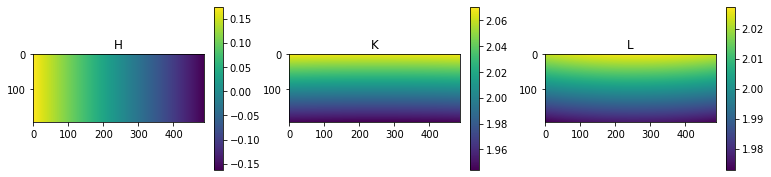

In [10]:
# Plotting HKL values for RSM
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
ax1.set_title("H")
ax2.set_title("K")
ax3.set_title("L")
qx_plot = ax1.imshow(qx.T)
qy_plot = ax2.imshow(qy.T)
qz_plot = ax3.imshow(qz.T)
fig.colorbar(qx_plot, ax=ax1)
fig.colorbar(qy_plot, ax=ax2)
fig.colorbar(qz_plot, ax=ax3)

plt.show()